# Instructions

* Make a copy of this notebook in your drive (File -> Make a copy in Drive).
* Complete the following problem statement.
* Ensure that the link to this notebook is public - open it in a browser where you're not logged in and verify that its contents can be seen. This must include the outputs of each cell, including the final plot.
* Share the link to the Colab notebook in the internship application form: https://docs.google.com/forms/d/e/1FAIpQLSc6-VTEfIrykx0EeYtUR4ykd0DSu4k9Jp7DgjDHtaqklnw3Pw/viewform?usp=sf_link
* Feel free to use any resource (including GPT-like tools) to complete this assignment, as long as you do it by yourself and understand what is done.

**Do not share your solution publicly until the end of April!** It will reduce your chances of being selected if others copy your solution. You are free to post your solution publicly on your portfolio after April.

Don't submit queries to us about this assignment - you are expected to understand this from the limited information in the problem statement.


## Problem statement

Investigate the effect of training set size on the classification performance for the MNIST-Fashion dataset.

1. Download the dataset from any source you prefer.
2. Display a few example images from the dataset.
3. Write a function to sample subsets of different sizes (starting from 0.1% to 10%) from the training split.
4. On each sampled subset
    1. Train a classifier. Hint: Flatten image pixels, then PCA, then kNN.
    2. Score the classifier on the test set
5. Plot the test accuracy (y-axis) against the training set size (x-axis)


## How is this scored?

Your submission will be scored on 3 dimensions:

1. Completion: Did you solve the problem?
2. Style: Is your code well written and organized?
3. Presentation: Do you describe each step of the process, and connect logically from one section to the next?

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
training_data = pd.read_csv("./fashion-mnist_train.csv")
test_data = pd.read_csv("./fashion-mnist_test.csv")


In [5]:
training_data.shape

(60000, 785)

In [6]:
test_data.shape

(10000, 785)

In [7]:
training_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def plot_image(data):
  plt.imshow(data, cmap="gray")
  plt.show()

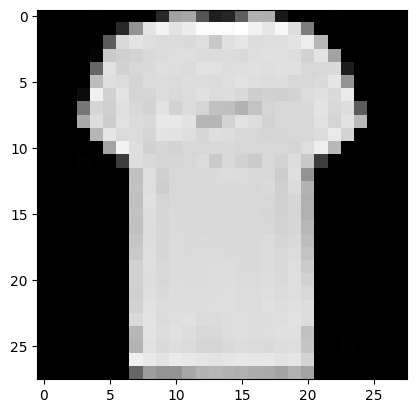

In [9]:
image_np = np.array(training_data.iloc[10][1:])
image_np = np.reshape(image_np, (28, 28))
plot_image(image_np)

In [10]:
# Funstion for generating subsample from train data
def generate_subsample(train_data, sample_size):
  subsample = train_data.sample(frac=sample_size, random_state=42)
  return subsample

In [11]:
train_subsample = generate_subsample(training_data, 0.1)
print(len(training_data))
print(len(train_subsample))

60000
6000


In [12]:
train_subsample.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,8,0,0,0,0,0,0,0,0,0,...,187,190,196,201,209,221,218,211,102,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8279,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
target = train_subsample['label']
X_train = train_subsample.drop(['label'], axis=1)
# Normalization
X_train = X_train/255

In [14]:
pca = PCA(n_components=64, random_state=42)

In [15]:
x_reduced = pca.fit_transform(X_train)
x_reduced.shape

(6000, 64)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(x_reduced, target)

KNeighborsClassifier(n_neighbors=3)

In [18]:
x_test = test_data.drop(['label'], axis=1)
# Normalization
x_test = x_test/255
target_test = test_data['label']
test_reduced = pca.transform(x_test)

In [19]:
pred_test = knn.predict(test_reduced)

In [20]:
accuracy = accuracy_score(pred_test, target_test)
print("test accuracy =" , accuracy)

test accuracy = 0.8177


In [21]:
# This class will take training data, test data, sample size for subsampling of training data and return accuracy on test data for model fitted on different subsample
class solution:
  def __init__(self, train_df, sample_size, test_df, seed, components, neighbors):
    self.train_df = train_df
    self.sample_size = sample_size
    self.test_df = test_df
    self.seed = seed
    self.components = components
    self.neighbors = neighbors

  # Subsample genration
  def generate_subsample(self):
    self.train_subsample = self.train_df.sample(frac = self.sample_size, random_state=self.seed)

  # Apply pca
  def apply_pca(self):
    pca = PCA(n_components=self.components, random_state=self.seed)
    x_train = self.train_subsample.drop(['label'], axis=1)
    x_train = x_train/255
    self.y_train = self.train_subsample['label']
    self.x_reduced = pca.fit_transform(x_train)
    return pca

  # Apply KNN
  def apply_knn(self):
    knn = KNeighborsClassifier(n_neighbors = self.neighbors)
    knn.fit(self.x_reduced, self.y_train)
    return knn

  # Measure accuracy on test data
  def test_accuracy(self):
    x_test = self.test_df.drop(['label'], axis=1)
    x_test = x_test/255
    y_test = self.test_df['label']
    self.generate_subsample()
    pca = self.apply_pca()
    knn = self.apply_knn()
    x_test_reduced = pca.transform(x_test)
    pred = knn.predict(x_test_reduced)
    accuracy = accuracy_score(pred, y_test)
    return accuracy


In [22]:
# Check: Working of the above class
sol = solution(training_data, 0.1, test_data, 42, 64, 3)

In [23]:
test_accuracy = sol.test_accuracy()
test_accuracy

0.8177

In [24]:
# Test accuracy using knn fitted on different subsampled train data
subsample_accuracy = []
sample_sizes = []
for i in range(1, 11):
  sample_size = i/100
  sample_sizes.append(sample_size)
  sol = solution(training_data, sample_size, test_data, 42, 128, 3)
  test_accuracy = sol.test_accuracy()
  subsample_accuracy.append(test_accuracy)

Text(0.5, 1.0, 'accuracy vs sample size plot')

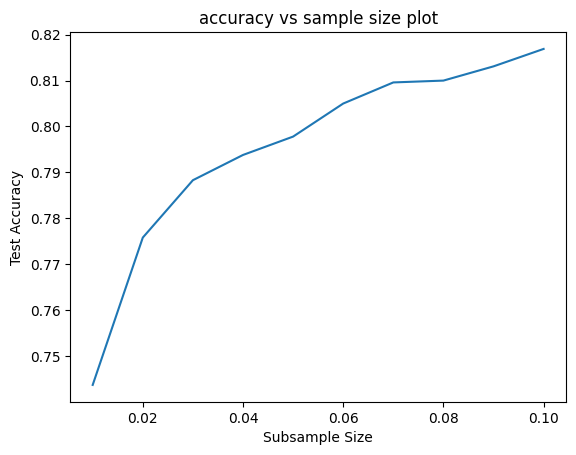

In [25]:
# Plotting accuracy vs sample size graph
plt.plot(sample_sizes, subsample_accuracy)
plt.xlabel('Subsample Size')
plt.ylabel("Test Accuracy")
plt.title("accuracy vs sample size plot")